In [1]:
import numpy as np
import numpy.linalg as nl
import scipy.linalg as sl
import scipy.integrate as si
import matplotlib.pyplot as plt

In [2]:
# function we are trying to approximate
def f(x, choice=4):
    if choice == 0:
        # dimensionless quantum harmonic oscillator potential
        return 0.5 * x**2
    elif choice == 1:
        # symmetric double well potential
        return 0.0025 * (x ** 2 - 25) ** 2
    elif choice == 2:
        # asymmetric double well potential
        return 0.0003 * ((x - 3) ** 4 + 10 * (x - 5) ** 3)
    elif choice == 3:
        # soft coulomb potential
        return -1 / np.sqrt(x ** 2 + 0.25)
    elif choice == 4:
        # a complicated function made by Harish
        return np.cos(x**2) - x*np.sin(x)
    else:
        print('Function v(x, choice=0): Did not recognise your input for choice.')

In [3]:
# vectorized version of Gaussian basis function
# Gaussian centered at grid point j*h with shape parameter alpha
# z_{ij} = x_i - j*h
def gbm(z, alpha):
    return np.exp(-alpha * z**2)

In [4]:
def gbmatfn(x1, x2, alpha):
    # make arrays that can be used in vectorized evaluations
    # row values are x1 and column values are x2
    x1v, x2v = np.meshgrid(x1, x2, sparse=True, indexing='ij')

    # make Gaussian basis matrix
    # We want [gbmat @ cfs](x_i) = vtrue(x_i), so each row
    # in gbmat is an x_i point and each column is a j*h
    # point. Given N x_i points and J j values, gbmat
    # is an NxJ matrix
    return gbm(x1v - x2v, alpha)

In [5]:
# function for computing the L2 error given J
def gbcfs(J, L, alpha):
    # make vector of x points for Gaussian centers
    # with spacing h
    h = L/J
    xg = np.arange(-J, J+1) * h

    # make Gaussian basis matrix
    gbmat = gbmatfn(xg, xg, alpha)

    # vector of the function evaluated on
    # the xg grid (needed for computing
    # basis coefficients)
    fxgt = f(xg)

    # solve gbmat @ gbcfs = fxjtrue
    # to compute Gaussian basis coefficients
    # gbmat must be a square matrix
    cfs = sl.solve(gbmat, fxgt, assume_a='sym')

    return cfs, xg

In [6]:
def L2err(cfs, xg, L, alpha):
    # function representation of L2 norm
    def integrand(x):
        # when more than one x point is evaluated,
        # x forms the rows and xg forms the columns
        gbmat = gbmatfn(x, xg, alpha)
        return np.square(gbmat @ cfs - f(x))

    # integrate to get the square of the L2 error
    l2errsq, _ = si.quadrature(integrand, -L, L, maxiter=500, tol=1e-8, rtol=1e-8)
    return np.sqrt(l2errsq)

In [7]:
# compute L^\infty error

# Grid of x_i points should be fine enough that the answer is stable
# (i.e. further refinement does not appreciably change the answer)
# also the answer should be reasonably accurate, that is, if
# you graph |fapprox(x) - f(x)| vs. x that the maximum isn't
# obviously different from the L^\infty error

def Linferr(n, cfs, xg, L, alpha):
    x = np.linspace(-L, L, n)
    fxt = f(x)
    gbmat = gbmatfn(x, xg, alpha)
    fxp = gbmat @ cfs
    absdif = np.abs(fxp - fxt)
    return np.max(absdif)

/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.19607e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')


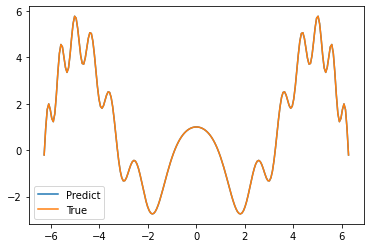

h value: 0.06283185307179587
L2 Error: 0.0001399555132323139
L\infty Error: 0.0001658880894401804


In [8]:
bigJ = 100
bigL = 2*np.pi
myalpha = 3.0
cfsrtn, xgrtn = gbcfs(bigJ, bigL, myalpha)

gbmatrtn = gbmatfn(xgrtn, xgrtn, myalpha)

fxtrue = f(xgrtn)
fxprdt = gbmatrtn @ cfsrtn

# plot the truth vs reconstruction
plt.plot(xgrtn, fxprdt, label='Predict')
plt.plot(xgrtn, fxtrue, label='True')
plt.legend()
plt.show()

print(f'h value: {bigL/bigJ}',
      f'L2 Error: {L2err(cfsrtn, xgrtn, bigL, myalpha)}',
      f'L\infty Error: {Linferr(1000, cfsrtn, xgrtn, bigL, myalpha)}',
      sep='\n')

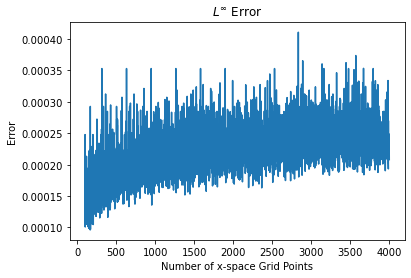

In [11]:
nvec = range(100, 4000)
lennvec = len(nvec)
Linferrvec = np.zeros(lennvec, dtype=float)
for i in range(lennvec):
    Linferrvec[i] = Linferr(nvec[i], cfsrtn, xgrtn, bigL, myalpha)

plt.plot(nvec, Linferrvec)
plt.title(r'$L^\infty$ Error')
plt.xlabel('Number of x-space Grid Points')
plt.ylabel('Error')
plt.show()

---

In [18]:
jspace = np.arange(5, 120)  # 60)
lenjspace = len(jspace)
hvec = np.zeros(lenjspace, dtype=float)
L2errvec = np.zeros(lenjspace, dtype=float)
LIerrvec = np.zeros(lenjspace, dtype=float)

# main loop
for i in range(lenjspace):
    print(f'Computing {i+1} of {lenjspace}')
    hvec[i] = bigL / jspace[i]
    thiscfs, thisxgr = gbcfs(jspace[i], bigL, myalpha)
    L2errvec[i] = L2err(thiscfs, thisxgr, bigL, myalpha)
    LIerrvec[i] = Linferr(2000, thiscfs, thisxgr, bigL, myalpha)

Computing 1 of 115
Computing 2 of 115
Computing 3 of 115
Computing 4 of 115
Computing 5 of 115
Computing 6 of 115
Computing 7 of 115
Computing 8 of 115
Computing 9 of 115
Computing 10 of 115
Computing 11 of 115
Computing 12 of 115
Computing 13 of 115
Computing 14 of 115
Computing 15 of 115
Computing 16 of 115
Computing 17 of 115
Computing 18 of 115
Computing 19 of 115
Computing 20 of 115
Computing 21 of 115
Computing 22 of 115
Computing 23 of 115
Computing 24 of 115
Computing 25 of 115
Computing 26 of 115
Computing 27 of 115
Computing 28 of 115
Computing 29 of 115
Computing 30 of 115
Computing 31 of 115
Computing 32 of 115
Computing 33 of 115
Computing 34 of 115
Computing 35 of 115
Computing 36 of 115
Computing 37 of 115
Computing 38 of 115
Computing 39 of 115
Computing 40 of 115
Computing 41 of 115
Computing 42 of 115
Computing 43 of 115
Computing 44 of 115
Computing 45 of 115
Computing 46 of 115
Computing 47 of 115
Computing 48 of 115
Computing 49 of 115
Computing 50 of 115
Computing

/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=4.56661e-17): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.90134e-17): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=3.42011e-18): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.57988e-18): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.65489e

Computing 67 of 115
Computing 68 of 115
Computing 69 of 115
Computing 70 of 115
Computing 71 of 115
Computing 72 of 115
Computing 73 of 115
Computing 74 of 115
Computing 75 of 115
Computing 76 of 115
Computing 77 of 115
Computing 78 of 115
Computing 79 of 115
Computing 80 of 115
Computing 81 of 115
Computing 82 of 115
Computing 83 of 115
Computing 84 of 115
Computing 85 of 115
Computing 86 of 115
Computing 87 of 115
Computing 88 of 115
Computing 89 of 115
Computing 90 of 115
Computing 91 of 115
Computing 92 of 115
Computing 93 of 115
Computing 94 of 115
Computing 95 of 115
Computing 96 of 115
Computing 97 of 115
Computing 98 of 115
Computing 99 of 115
Computing 100 of 115
Computing 101 of 115
Computing 102 of 115
Computing 103 of 115
Computing 104 of 115
Computing 105 of 115
Computing 106 of 115
Computing 107 of 115
Computing 108 of 115
Computing 109 of 115
Computing 110 of 115
Computing 111 of 115
Computing 112 of 115
Computing 113 of 115
Computing 114 of 115
Computing 115 of 115


/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=4.76508e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.98875e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=7.98717e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=4.66623e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=4.04211e

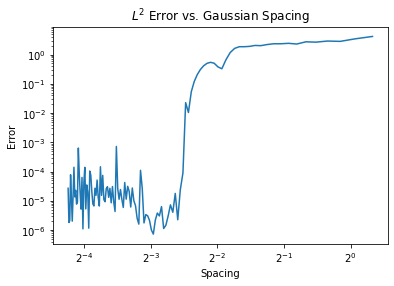

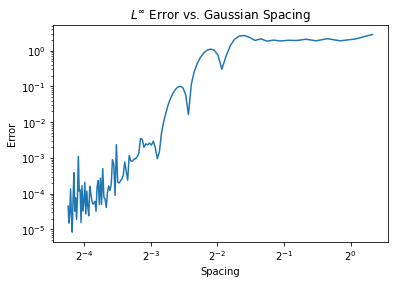

In [19]:
plt.loglog(hvec, L2errvec)
plt.xscale('log', base=2)
plt.yscale('log', base=10)
plt.title(r'$L^2$ Error vs. Gaussian Spacing')
plt.xlabel('Spacing')
plt.ylabel('Error')
plt.show()

plt.loglog(hvec, LIerrvec)
plt.xscale('log', base=2)
plt.yscale('log', base=10)
plt.title(r'$L^\infty$ Error vs. Gaussian Spacing')
plt.xlabel('Spacing')
plt.ylabel('Error')
plt.show()

Computing 1 of 55
Computing 2 of 55
Computing 3 of 55
Computing 4 of 55
Computing 5 of 55
Computing 6 of 55
Computing 7 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.312414e-02
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=5.54398e-18): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 6.067657e-01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.13992e-18): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.719742e+00
  warn

Computing 8 of 55
Computing 9 of 55
Computing 10 of 55
Computing 11 of 55
Computing 12 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.745346e+03
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.67875e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.521710e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.71638e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.953719e+01
  warn

Computing 13 of 55
Computing 14 of 55
Computing 15 of 55
Computing 16 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.691964e+04
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=3.15028e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 6.695734e+00
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.74894e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.843182e+01
  warn

Computing 17 of 55
Computing 18 of 55
Computing 19 of 55
Computing 20 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.593880e+03
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.43901e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.563348e+02
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.17742e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.834147e+02
  warn

Computing 21 of 55
Computing 22 of 55
Computing 23 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 7.822867e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.84942e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.569540e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.64737e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.816996e+02
  warn

Computing 24 of 55
Computing 25 of 55
Computing 26 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.412966e+02
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=9.0371e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.795291e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=6.91831e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 7.145861e+01
  warni

Computing 27 of 55
Computing 28 of 55
Computing 29 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.814975e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.36653e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.103542e+00
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=4.97196e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.187827e+03
  warn

Computing 30 of 55
Computing 31 of 55
Computing 32 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.340287e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.21017e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.290798e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=8.83967e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 6.749914e+02
  warn

Computing 33 of 55
Computing 34 of 55
Computing 35 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 7.380953e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=3.39997e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.286779e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=9.72389e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.019502e-01
  warn

Computing 36 of 55
Computing 37 of 55
Computing 38 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.245320e+02
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=7.83145e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.163214e+02
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=6.23844e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.711108e+00
  warn

Computing 39 of 55
Computing 40 of 55
Computing 41 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.556899e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.5184e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 7.219128e+02
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.13737e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.563357e+01
  warni

Computing 42 of 55
Computing 43 of 55
Computing 44 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.286018e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.71721e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 7.185720e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.24703e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')


Computing 45 of 55
Computing 46 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.121401e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=5.77689e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 6.709507e+00
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=6.18229e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')


Computing 47 of 55
Computing 48 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 5.646039e+00
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=7.74383e-21): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.091494e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=3.19548e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')


Computing 49 of 55
Computing 50 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.393231e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.40646e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.106362e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=9.57324e-22): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.409420e+03
  warn

Computing 51 of 55
Computing 52 of 55
Computing 53 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.193459e+02
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=6.01734e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.461434e+02
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.97118e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')


Computing 54 of 55
Computing 55 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.557241e+02
  warnings.warn(
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.058576e-04
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=7.67245e-17): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.404976e-01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=5.72744e-18): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assum

Computing 1 of 55
Computing 2 of 55
Computing 3 of 55
Computing 4 of 55
Computing 5 of 55
Computing 6 of 55
Computing 7 of 55
Computing 8 of 55
Computing 9 of 55
Computing 10 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.878562e+00
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=4.57727e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 8.719052e+00
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.34115e-18): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.921538e+01
  warn

Computing 11 of 55
Computing 12 of 55
Computing 13 of 55
Computing 14 of 55
Computing 15 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.207008e+02
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.12427e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.651497e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=7.9634e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.393572e+01
  warni

Computing 16 of 55
Computing 17 of 55
Computing 18 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.036703e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.67601e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.430794e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=3.48382e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.396020e+01
  warn

Computing 19 of 55
Computing 20 of 55
Computing 21 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.055735e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=5.0451e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.328867e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.61636e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.963232e+00
  warni

Computing 22 of 55
Computing 23 of 55
Computing 24 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.455237e+02
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.57998e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 5.412752e+00
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.17061e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.863914e+01
  warn

Computing 25 of 55
Computing 26 of 55
Computing 27 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 5.524966e+02
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.15025e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.873199e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=5.73512e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.247785e+01
  warn

Computing 28 of 55
Computing 29 of 55
Computing 30 of 55
Computing 31 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.107205e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=3.61961e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 8.596635e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.21068e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.322380e+03
  warn

Computing 32 of 55
Computing 33 of 55
Computing 34 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.377075e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.69045e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.507208e+02
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.31139e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.725377e+00
  warn

Computing 35 of 55
Computing 36 of 55
Computing 37 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.181599e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.9259e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 5.391709e+00
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=8.67783e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.290714e+01
  warni

Computing 38 of 55
Computing 39 of 55
Computing 40 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 6.274261e+00
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=8.33483e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.935637e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.46389e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 8.232992e+01
  warn

Computing 41 of 55
Computing 42 of 55
Computing 43 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.220558e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.10497e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.183105e+02
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.47602e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 8.497686e+00
  warn

Computing 44 of 55
Computing 45 of 55
Computing 46 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.055019e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.58475e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.555881e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.09376e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.135585e+01
  warn

Computing 47 of 55
Computing 48 of 55
Computing 49 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 9.191046e+00
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.93986e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.530866e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=6.29307e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.011758e+01
  warn

Computing 50 of 55
Computing 51 of 55
Computing 52 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.396214e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=5.61415e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.531765e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=4.2746e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.533800e+02
  warni

Computing 53 of 55
Computing 54 of 55
Computing 55 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.187242e+01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=9.86694e-18): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.677419e-06
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=9.29418e-18): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')


Computing 1 of 55
Computing 2 of 55
Computing 3 of 55
Computing 4 of 55
Computing 5 of 55
Computing 6 of 55
Computing 7 of 55
Computing 8 of 55
Computing 9 of 55
Computing 10 of 55
Computing 11 of 55
Computing 12 of 55
Computing 13 of 55
Computing 14 of 55
Computing 15 of 55
Computing 16 of 55
Computing 17 of 55
Computing 18 of 55
Computing 19 of 55
Computing 20 of 55
Computing 21 of 55
Computing 22 of 55
Computing 23 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.926401e-05
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=9.15083e-18): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.531913e-05
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=7.01365e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 5.866275e-05
  warn

Computing 24 of 55
Computing 25 of 55
Computing 26 of 55
Computing 27 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.011423e-05
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.17113e-18): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=6.95477e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.101511e-04
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.93478e-19): result may not be accurate.
  cfs = sl.s

Computing 28 of 55
Computing 29 of 55
Computing 30 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 6.503758e-03
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=4.23608e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.079313e-04
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=3.79732e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 7.492280e-04
  warn

Computing 31 of 55
Computing 32 of 55
Computing 33 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.365901e-04
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.68635e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 7.525203e-05
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=4.76399e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 5.012374e-04
  warn

Computing 34 of 55
Computing 35 of 55
Computing 36 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.974464e-04
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=3.24927e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.387749e-04
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=6.62944e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.067522e-04
  warn

Computing 37 of 55
Computing 38 of 55
Computing 39 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 5.320614e-04
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.44735e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.035972e-04
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=5.53136e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.998488e-04
  warn

Computing 40 of 55
Computing 41 of 55
Computing 42 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.560534e-05
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=8.08328e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 9.249516e-06
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.70784e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.138002e-03
  warn

Computing 43 of 55
Computing 44 of 55
Computing 45 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.710140e-03
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=4.43501e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 5.247500e-05
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=8.81267e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 5.221681e-03
  warn

Computing 46 of 55
Computing 47 of 55
Computing 48 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 8.898795e-03
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.12237e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.877422e-03
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=3.3633e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')


Computing 49 of 55
Computing 50 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.291302e-04
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.42776e-19): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.550375e-05
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.03276e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.065579e-03
  warn

Computing 51 of 55
Computing 52 of 55
Computing 53 of 55


/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.175530e-02
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=3.2172e-20): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.040582e-01
  warnings.warn(
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=7.82945e-21): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/Users/morty/miniforge3/envs/work0122/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:276: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.260813e-01
  warni

Computing 54 of 55
Computing 55 of 55
Computing 1 of 55
Computing 2 of 55
Computing 3 of 55
Computing 4 of 55
Computing 5 of 55
Computing 6 of 55
Computing 7 of 55
Computing 8 of 55
Computing 9 of 55
Computing 10 of 55
Computing 11 of 55
Computing 12 of 55
Computing 13 of 55
Computing 14 of 55
Computing 15 of 55
Computing 16 of 55
Computing 17 of 55
Computing 18 of 55
Computing 19 of 55
Computing 20 of 55
Computing 21 of 55
Computing 22 of 55
Computing 23 of 55
Computing 24 of 55
Computing 25 of 55
Computing 26 of 55
Computing 27 of 55
Computing 28 of 55
Computing 29 of 55
Computing 30 of 55
Computing 31 of 55
Computing 32 of 55
Computing 33 of 55
Computing 34 of 55
Computing 35 of 55
Computing 36 of 55
Computing 37 of 55
Computing 38 of 55
Computing 39 of 55
Computing 40 of 55
Computing 41 of 55
Computing 42 of 55
Computing 43 of 55
Computing 44 of 55
Computing 45 of 55
Computing 46 of 55
Computing 47 of 55
Computing 48 of 55
Computing 49 of 55
Computing 50 of 55
Computing 51 of 55
Co

/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=4.56661e-17): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.90134e-17): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=3.42011e-18): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.57988e-18): result may not be accurate.
  cfs = sl.solve(gbmat, fxgt, assume_a='sym')
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_99540/1313790090.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.65489e

Computing 20 of 55
Computing 21 of 55
Computing 22 of 55
Computing 23 of 55
Computing 24 of 55
Computing 25 of 55
Computing 26 of 55
Computing 27 of 55
Computing 28 of 55
Computing 29 of 55
Computing 30 of 55
Computing 31 of 55
Computing 32 of 55
Computing 33 of 55
Computing 34 of 55
Computing 35 of 55
Computing 36 of 55
Computing 37 of 55
Computing 38 of 55
Computing 39 of 55
Computing 40 of 55
Computing 41 of 55
Computing 42 of 55
Computing 43 of 55
Computing 44 of 55
Computing 45 of 55
Computing 46 of 55
Computing 47 of 55
Computing 48 of 55
Computing 49 of 55
Computing 50 of 55
Computing 51 of 55
Computing 52 of 55
Computing 53 of 55
Computing 54 of 55
Computing 55 of 55


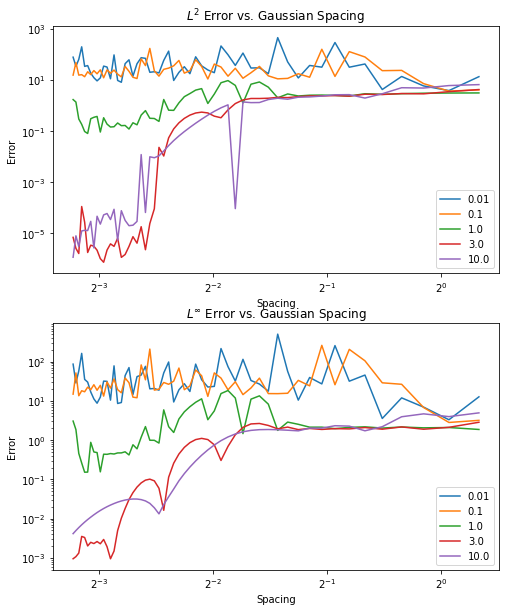

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

for thisalpha in [0.01, 0.1, 1.0, 3.0, 10.0]:
    jspace = np.arange(5, 60)
    lenjspace = len(jspace)
    hvec = np.zeros(lenjspace, dtype=float)
    L2errvec = np.zeros(lenjspace, dtype=float)
    LIerrvec = np.zeros(lenjspace, dtype=float)

    # main loop
    for i in range(lenjspace):
        print(f'Computing {i+1} of {lenjspace}')
        hvec[i] = bigL / jspace[i]
        thiscfs, thisxgr = gbcfs(jspace[i], bigL, thisalpha)
        L2errvec[i] = L2err(thiscfs, thisxgr, bigL, thisalpha)
        LIerrvec[i] = Linferr(2000, thiscfs, thisxgr, bigL, thisalpha)

    ax1.loglog(hvec, L2errvec, label=f'{thisalpha}')
    ax2.loglog(hvec, LIerrvec, label=f'{thisalpha}')


ax1.set_title(r'$L^2$ Error vs. Gaussian Spacing')
ax1.set_xscale('log', base=2)
ax1.set_yscale('log', base=10)
ax1.set_xlabel('Spacing')
ax1.set_ylabel('Error')
ax1.legend()

ax2.set_title(r'$L^\infty$ Error vs. Gaussian Spacing')
ax2.set_xscale('log', base=2)
ax2.set_yscale('log', base=10)
ax2.set_xlabel('Spacing')
ax2.set_ylabel('Error')
ax2.legend()

plt.show()